In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import StratifiedShuffleSplit

data= fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554

In [2]:
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
targetNumber = 1
dfData["target"] = dfData["target"].apply(lambda x: 1 if int(x) == targetNumber else 0)

In [3]:
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [4]:
from sklearn.linear_model import LogisticRegression
logReg_clf = LogisticRegression()
logReg_clf.fit(X_train, y_train)

y_test_pred = logReg_clf.predict(X_test)

/Users/maxschallwig/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We can find the list of all scoring metrics here
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [5]:
# binary classification roc_auc_score
from sklearn.metrics import roc_auc_score

y_test_scores = logReg_clf.decision_function(X_test)

auc = roc_auc_score(y_true=y_test,
                    y_score=y_test_scores
                   )
print("auc:",np.round(auc,4))

auc: 0.9972


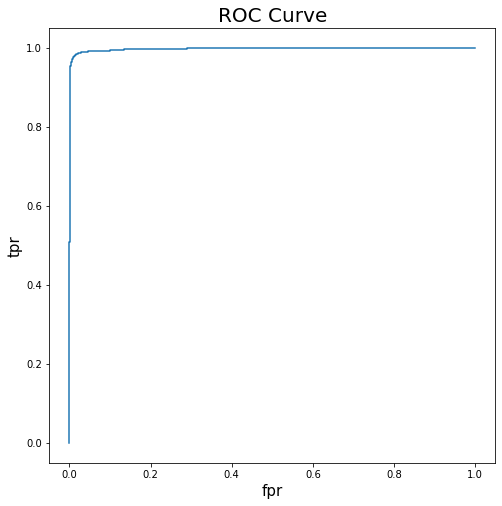

In [6]:
from sklearn.metrics import roc_curve

y_test_scores = logReg_clf.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_test_scores
                                 )
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel("fpr",fontsize=15)
plt.ylabel("tpr",fontsize=15)
plt.title("ROC Curve",fontsize=20)
plt.show()

In [7]:
data= fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train_multi = dfData[data["feature_names"]].iloc[train_index]
    X_test_multi = dfData[data["feature_names"]].iloc[test_index]
    
    y_train_multi = dfData["target"].iloc[train_index]
    y_test_multi = dfData["target"].iloc[test_index]
    
logReg_multi_clf = LogisticRegression()
logReg_multi_clf.fit(X_train_multi, y_train_multi)

y_test_multi_pred = logReg_multi_clf.predict(X_test_multi)

/Users/maxschallwig/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
# multiclass classification roc_auc_score
from sklearn.metrics import roc_auc_score

y_test_multi_scores = logReg_multi_clf.predict_proba(X_test_multi)

auc = roc_auc_score(y_true=y_test_multi,
                    y_score=y_test_multi_scores,
                    average='weighted',
                    multi_class='ovr' # need to set this
                   )
print("auc:",np.round(auc,4))

auc: 0.9937


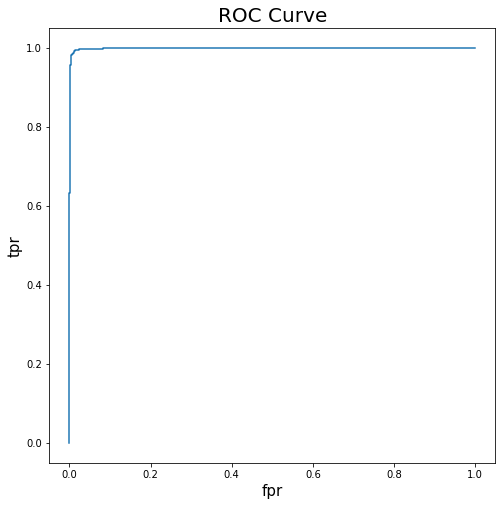

In [9]:
# also do multi class evaluation
from sklearn.metrics import roc_curve

y_test_multi_scores = logReg_multi_clf.predict_proba(X_test_multi)

targetLabel = '1'
tarLabInd = np.argmax(logReg_multi_clf.classes_==targetLabel)

fpr, tpr, thresholds = roc_curve(y_true=y_test_multi,
                                 y_score=y_test_multi_scores[:, tarLabInd],
                                 pos_label=targetLabel # since our original labels are strings
                                )
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel("fpr",fontsize=15)
plt.ylabel("tpr",fontsize=15)
plt.title("ROC Curve",fontsize=20)
plt.show()

In [10]:
logReg_multi_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [11]:
y_test_multi_scores.shape

(14000, 10)

In [12]:
y_test_multi

29205    0
5801     0
18245    4
41828    6
24289    1
        ..
45482    5
65127    2
44147    5
9972     2
21761    7
Name: target, Length: 14000, dtype: object